In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
numOFComponents=np.arange(100,3000,100)
numOFSubjects=np.arange(1,19,1)


<h1> 1500ms Results (Whole Features) is used to decide which classifier is better</h1>

In [3]:
LRAvgAUC = np.array([7.60455417e-01,8.46677930e-01,8.81787761e-01,8.91840090e-01,9.01828616e-01,9.04873173e-01,9.07688255e-01,
            9.07050102e-01,9.06393500e-01,9.07965963e-01,9.09908984e-01,9.09593949e-01,9.09735292e-01,9.10915768e-01,
            9.11973762e-01,9.11699045e-01,9.12102585e-01,9.12944466e-01,9.12996801e-01,9.13298637e-01,9.13316086e-01,
            9.13298142e-01,9.12944101e-01,9.12996482e-01,9.12979352e-01,9.12570360e-01,9.12605611e-01,9.12149803e-01,
            9.12149803e-01])

In [4]:
LDAAvgAUC = np.array([7.59970103e-01,8.58725674e-01,8.97892431e-01,9.14636319e-01,9.22473861e-01,9.19796867e-01,9.21427373e-01,
             9.23948453e-01,9.23700747e-01,9.24826587e-01,9.23627644e-01,9.24028302e-01,9.24317531e-01,9.22497976e-01,
             9.20642190e-01,9.19450249e-01,9.17586469e-01,9.18340745e-01,9.11432256e-01,9.07684717e-01,9.12095558e-01,
             9.08036500e-01,9.08187000e-01,9.02257261e-01,9.00926223e-01,9.03714142e-01,8.96352824e-01,8.99502817e-01,
             8.97323011e-01])

In [5]:
LRBestAUC = np.array([8.58223062e-01,9.52704798e-01,9.16605084e-01,8.66431747e-01,7.24182243e-01,9.76376170e-01,9.76470588e-01,
             9.52941176e-01,8.00359580e-01,9.19784401e-01,9.48762376e-01,9.47590738e-01,9.57894307e-01,9.47107364e-01,
             9.54545455e-01,9.69682089e-01,9.49984773e-01,8.93309671e-01])

In [6]:
LDABestAUC = np.array([9.03906742e-01,9.66038131e-01,9.53055720e-01,8.94603479e-01,9.04114746e-01,9.70946706e-01,9.70269967e-01,
              9.58506271e-01,8.28061036e-01,9.26997464e-01,9.49071782e-01,9.61045056e-01,9.58523238e-01,9.21763061e-01,
              9.60227273e-01,9.63618507e-01,9.68187036e-01,9.08146325e-01])

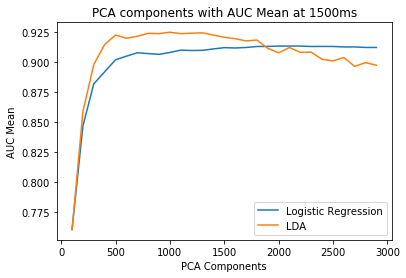

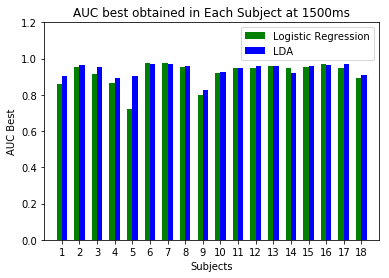

In [7]:
plt.plot(numOFComponents, LRAvgAUC, label="Logistic Regression")
plt.plot(numOFComponents, LDAAvgAUC, label="LDA")
plt.ylabel("AUC Mean")
plt.xlabel("PCA Components")
plt.title("PCA components with AUC Mean at 1500ms")
plt.legend()
plt.show()


#BAR plot
w = 0.3
plt.bar(numOFSubjects-(w/2),LRBestAUC, width=w,color='g',label="Logistic Regression")
plt.bar(numOFSubjects+(w/2),LDABestAUC,width=w,color='b',label="LDA")
plt.ylabel("AUC Best")
plt.xlabel("Subjects")
plt.title("AUC best obtained in Each Subject at 1500ms")
plt.autoscale(tight=True)
plt.legend()
plt.ylim((0, 1.2))
plt.xlim((0,19))
plt.xticks(numOFSubjects, numOFSubjects)
plt.show()

#curve Curve
#plt.plot(numOFSubjects,LRBestAUC,color='g',label="Logistic Regression")
#plt.plot(numOFSubjects,LDABestAUC,color='b',label="LDA")
#plt.ylabel("AUC Best")
#plt.xlabel("Subjects")
#plt.title("AUC best in Each Subject at 1500ms")
#plt.autoscale(tight=True)
#plt.xlim((0,19))
#plt.legend()
#plt.xticks(numOFSubjects, numOFSubjects)
#plt.yticks(np.arange(0.7,1.1,0.05))
#plt.show()

In [8]:
print("PCA LDA Best Average is " + str(((np.argmax(LDAAvgAUC) + 1) * 100, np.max(LDAAvgAUC))))
print("Normal LDA Average= " + str(0.901637977))
print("\n")
print("PCA LR Best Average is " + str(((np.argmax(LRAvgAUC) + 1) * 100, np.max(LRAvgAUC))))
print("Normal LR Average = " + str(0.882374621))

PCA LDA Best Average is (1000, 0.924826587)
Normal LDA Average= 0.901637977


PCA LR Best Average is (2100, 0.913316086)
Normal LR Average = 0.882374621


<h3>LDA-PCA is found to be the best to use as it uses a smaller number of PCA components and yet results in better AUC value so i used it in trying different windows of data (different time samples)</h3>

<h1><strong>(I)CHECKING DIFFERENT PCA COMPONENTS FOR EACH TIME WINDOW</strong></h1>

In [9]:
def previewTheAvgCurve(curveValues,timeInMs):
    plt.plot(numOFComponents, curveValues, label="LDA ("+str(timeInMs)+" ms)")
    plt.ylabel("AUC Mean")
    plt.xlabel("PCA Components")
    plt.title("PCA components used to obtain AUC mean at "+timeInMs+"ms")
    plt.legend()
    plt.yticks(np.arange(0.6,1.05,0.05))
    plt.show()
    
def previewTheBestCurve(curveValues,timeInMs):
    plt.bar(numOFSubjects,curveValues,width=w,color='b',label="LDA ("+str(timeInMs)+" ms)")
    plt.ylabel("AUC Best")
    plt.xlabel("Subjects")
    plt.title("AUC best obtained from Each Subject at "+str(timeInMs)+" ms")
    plt.autoscale(tight=True)
    plt.legend()
    plt.ylim((0, 1.2))
    plt.xlim((0,19))
    plt.xticks(numOFSubjects, numOFSubjects)
    plt.show()
    
    #plt.plot(numOFSubjects,curveValues,color='b',label="LDA ("+str(timeInMs)+" ms)")
    #plt.ylabel("AUC Best")
    #plt.xlabel("Subjects")
    #plt.title("AUC best in Each Subject at "+timeInMs+"ms")
    #plt.autoscale(tight=True)
    #plt.xlim((0,19))
    #plt.legend()
    #plt.xticks(numOFSubjects, numOFSubjects)
    #plt.yticks(np.arange(0.6,1.05,0.05))
    #plt.show()
    

<h1> 1400ms Results

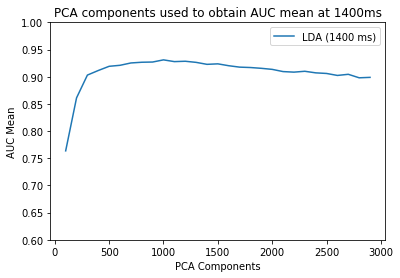

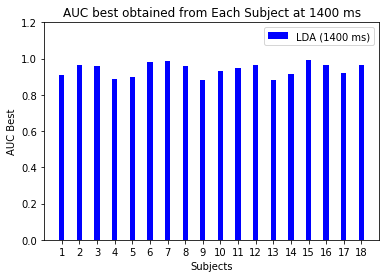

PCA LDA Best Average is (1000, 0.930996499)


In [10]:
LDAAvgAUC1400ms = np.array([7.63623528e-01,8.61044515e-01,9.03023123e-01,9.11443288e-01,9.19165112e-01,9.21006257e-01,
                          9.25308684e-01,9.26622753e-01,9.27023951e-01,9.30996499e-01,9.27789774e-01,9.28452661e-01,
                          9.26406997e-01,9.22771852e-01,9.23678271e-01,9.20227164e-01,9.17639770e-01,9.16915184e-01,
                          9.15459567e-01,9.13519723e-01,9.09446750e-01,9.08431166e-01,9.10016418e-01,9.07119512e-01,
                          9.05994295e-01,9.02354340e-01,9.04447273e-01,8.98009207e-01,8.98802796e-01])

LDABestAUC1400ms = np.array([9.10522999e-01,9.63534814e-01,9.57958930e-01,8.88280246e-01,8.99267251e-01,9.81610854e-01,
                             9.87459106e-01,9.59369483e-01,8.81984748e-01,9.32942295e-01,9.49271685e-01,9.65095328e-01,
                             8.83366945e-01,9.17494149e-01,9.92857143e-01,9.62184940e-01,9.19975982e-01,9.63537153e-01])
previewTheAvgCurve(LDAAvgAUC1400ms,"1400")
previewTheBestCurve(LDABestAUC1400ms,"1400")
print("PCA LDA Best Average is " + str(((np.argmax(LDAAvgAUC1400ms) + 1) * 100, np.max(LDAAvgAUC1400ms))))

<h1> 1300ms Results

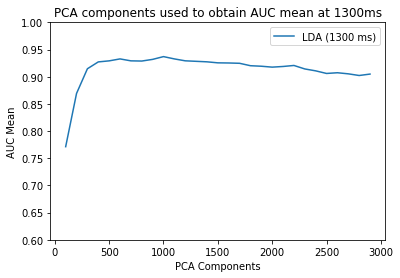

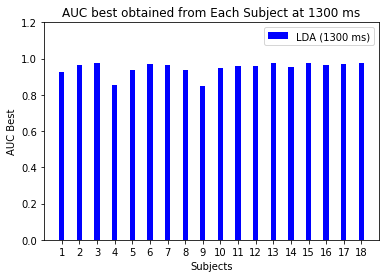

PCA LDA Best Average is (1000, 0.93699602)


In [11]:
LDAAvgAUC1300ms = np.array([7.71289077e-01,8.69229652e-01,9.14656118e-01, 9.27249251e-01,9.29182829e-01,9.32760185e-01,
                            9.29198030e-01,9.28829853e-01,9.31896847e-01,9.36996020e-01,9.32751664e-01,9.29246019e-01,
                            9.28333095e-01,9.27396149e-01,9.25530576e-01,9.25264200e-01,9.24697463e-01,9.20248035e-01,
                            9.19297272e-01,9.17634968e-01,9.18837737e-01,9.20704862e-01 ,9.14289479e-01,9.10795191e-01,
                            9.06001454e-01,9.07311260e-01,9.05307143e-01,9.02247259e-01,9.04856002e-01])


LDABestAUC1300ms = np.array([9.26688189e-01,9.67006308e-01,9.74027135e-01,8.52908132e-01,9.34429280e-01,9.72342853e-01,
                             9.62182741e-01,9.34976859e-01,8.51040036e-01,9.50072114e-01,9.57158808e-01,9.60558712e-01,
                             9.74164506e-01,9.51251171e-01,9.75308642e-01,9.63848883e-01,9.71973413e-01,9.74576271e-01])


previewTheAvgCurve(LDAAvgAUC1300ms,"1300")
previewTheBestCurve(LDABestAUC1300ms,"1300")
print("PCA LDA Best Average is " + str(((np.argmax(LDAAvgAUC1300ms) + 1) * 100, np.max(LDAAvgAUC1300ms))))

<h1> 1200ms Results</h1>

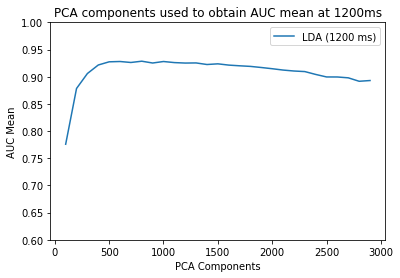

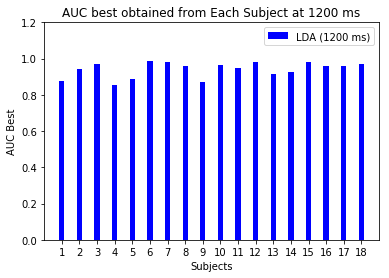

PCA LDA Best Average is (800, 0.928544)


In [12]:
LDAAvgAUC1200ms = np.array([0.77579625,0.87836878,0.90588562,0.92156878,0.92741346,0.92798929,0.92619938,0.928544,
                            0.92521826,0.92796942,0.92599045,0.92512981,0.9253559,0.92245964,0.92370121,0.92137848,
                            0.92009805,0.91899339,0.91694563,0.91471357,0.9122546,0.91050181,0.90946074,0.90420466,
                            0.89956866,0.8995165,0.89795521,0.8916247,0.89297582])

LDABestAUC1200ms = np.array([0.87906914,0.94272292,0.96968223,0.85679771,0.88577362,0.98669733,0.97941367,0.95682859,
                             0.87215009,0.96668164,0.94775034,0.98168892,0.91486639,0.92572327,0.98275862,0.9607245,
                             0.95820001,0.96850008])

previewTheAvgCurve(LDAAvgAUC1200ms,"1200")
previewTheBestCurve(LDABestAUC1200ms,"1200")
print("PCA LDA Best Average is " + str(((np.argmax(LDAAvgAUC1200ms) + 1) * 100, np.max(LDAAvgAUC1200ms))))

#(LDAAvgAUC1200ms-LDABestAUC1200ms)<0.00000005e-01
#0.92512983
#9.25355900e-01


<h1>1100ms Results</h1>

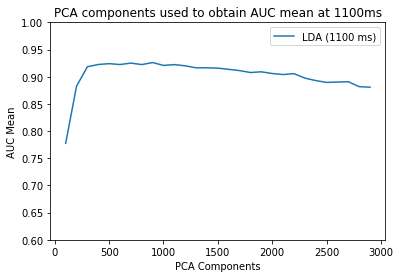

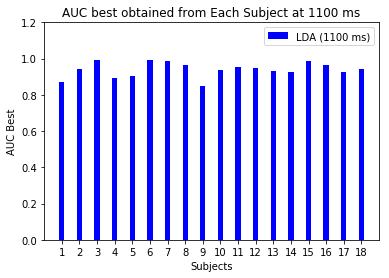

PCA LDA Best Average is (900, 0.92608357)


In [13]:
LDAAvgAUC1100ms = np.array([0.77748989,0.88257577,0.91836816,0.92249851,0.9240375,0.92244066,0.9250715,0.92232959,
                            0.92608357,0.92079763,0.92227194,0.92007389,0.91635282,0.91643329,0.9157623,0.91356656,
                            0.91128888,0.90771259,0.90901713,0.90589513,0.90403374,0.90559704,0.8974938,0.89292572,
                            0.88950689,0.89020972,0.8908099,0.88177764,0.88068071])

LDABestAUC1100ms = np.array([0.86830498,0.94136311,0.99319064,0.89408574,0.90409205,0.99295775,0.9863906,0.96496311,
                             0.84878576,0.93981939,0.95547304,0.94832746,0.93389626,0.92497896,0.98638207,0.96496072,
                             0.92552956,0.9402307])
previewTheAvgCurve(LDAAvgAUC1100ms,"1100")
previewTheBestCurve(LDABestAUC1100ms,"1100")
print("PCA LDA Best Average is " + str(((np.argmax(LDAAvgAUC1100ms) + 1) * 100, np.max(LDAAvgAUC1100ms))))

<h1>1000ms Results</h1>

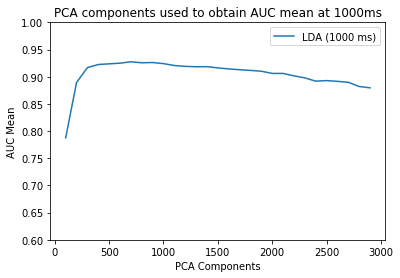

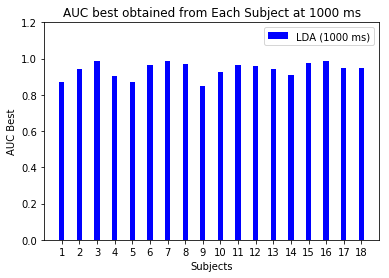

PCA LDA Best Average is (700, 0.92746619)


In [14]:
LDAAvgAUC1000ms = np.array([0.7875322,0.88928541,0.91674774,0.92244252,0.92371068,0.92491027,0.92746619,0.9256446,
                            0.92611262,0.92408385,0.92063324,0.91909223,0.91831531,0.91851375,0.91623974,0.91433826,
                            0.91289564,0.91159658,0.91013074,0.90606453,0.90606581,0.90155856,0.89792696,0.89186226,
                            0.89285976,0.89148628,0.8897634,0.88201377,0.87954977])

LDABestAUC1000ms = np.array([0.87048703,0.93984608,0.98614846,0.90574541,0.86946154,0.9651237,0.98406093,0.96763286,
                             0.84656893,0.9257161,0.9632581,0.96167084,0.94494869,0.91153363,0.97368421,0.98554487,
                             0.94790206,0.95012467])

previewTheAvgCurve(LDAAvgAUC1000ms,"1000")
previewTheBestCurve(LDABestAUC1000ms,"1000")
print("PCA LDA Best Average is " + str(((np.argmax(LDAAvgAUC1000ms) + 1) * 100, np.max(LDAAvgAUC1000ms))))

<h1>900ms Results</h1>

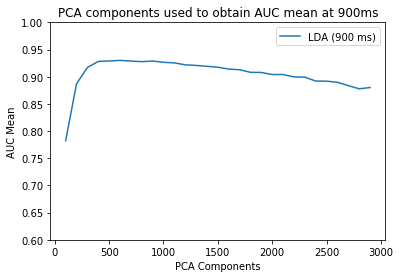

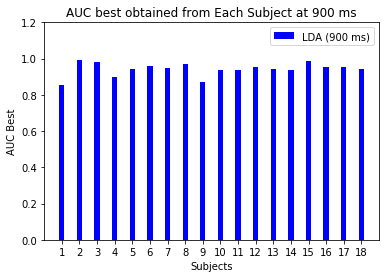

PCA LDA Best Average is (600, 0.93003608)


In [15]:
LDAAvgAUC900ms = np.array([0.78246959,0.88698205,0.91706101,0.92816689,0.928942,0.93003608,0.92876362,0.92776262,
                           0.92885074,0.92650388,0.92544175,0.92187125,0.92079779,0.91909465,0.91746651,0.91405293,
                           0.9128759,0.90806946,0.90781235,0.90399568,0.9040902,0.89963578,0.89919015,0.89203478,
                           0.89179824,0.88976871,0.88370109,0.8777523,0.88010168])

LDABestAUC900ms = np.array([0.85557349,0.99170839,0.98230651,0.89982273,0.94461118,0.95700042,0.94852941,0.97222222,
                            0.86874836,0.93686749,0.93953988,0.95113346,0.94413097,0.93835616,0.98717949,0.95442247,
                            0.95144326,0.94])

previewTheAvgCurve(LDAAvgAUC900ms,"900")
previewTheBestCurve(LDABestAUC900ms,"900")
print("PCA LDA Best Average is " + str(((np.argmax(LDAAvgAUC900ms) + 1) * 100, np.max(LDAAvgAUC900ms))))

<h1> 800ms Results</h1>

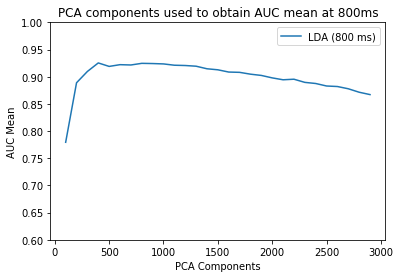

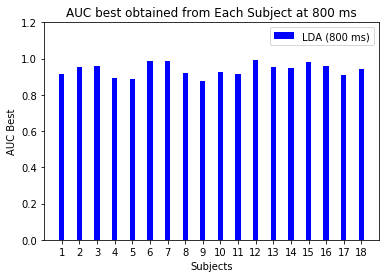

PCA LDA Best Average is (400, 0.92535837)


In [16]:
LDAAvgAUC800ms = np.array([0.77939187,0.88888925,0.90968941,0.92535837,0.91896836,0.92216715,0.92159417,0.92460906,
                           0.92423568,0.92354249,0.9211576,0.9206166,0.91934004,0.91461961,0.91273725,0.90858438,
                           0.90804893,0.90468828,0.90237424,0.89786659,0.89436617,0.89541271,0.88961048,0.88753681,
                           0.88293669,0.88197245,0.87782769,0.871462,0.86710572])

LDABestAUC800ms = np.array([0.91509434,0.95475102,0.95819842,0.89369919,0.88742289,0.98571429,0.98617043,0.92261905,
                            0.87811329,0.92508238,0.91593673,0.99181436,0.95259771,0.94572327,0.97972973,0.95668616,
                            0.90972222,0.94457297])
previewTheAvgCurve(LDAAvgAUC800ms,"800")
previewTheBestCurve(LDABestAUC800ms,"800")
print("PCA LDA Best Average is " + str(((np.argmax(LDAAvgAUC800ms) + 1) * 100, np.max(LDAAvgAUC800ms))))

<h1>700ms Results</h1>

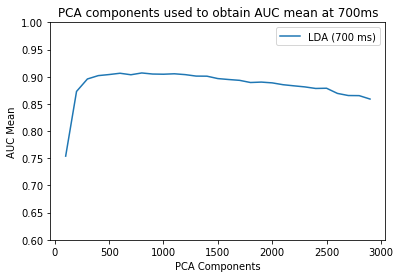

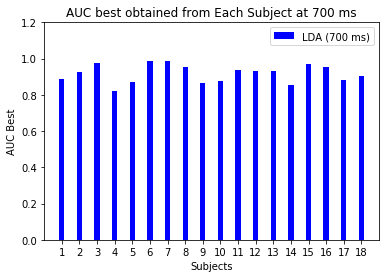

PCA LDA Best Average is (800, 0.90691592)


In [17]:
LDAAvgAUC700ms = np.array([0.75390398,0.8729502,0.89584499,0.90202695,0.90400649,0.90638524,0.90361865,0.90691592,
                           0.9049418,0.90460473,0.90539583,0.90385415,0.90115208,0.900981,0.89658036,0.8948443,
                           0.89334057,0.88934826,0.89011418,0.88868545,0.88530174,0.88322987,0.88128127,0.87839644,
                           0.87880808,0.86931452,0.86541163,0.86521123,0.85891378])

LDABestAUC700ms = np.array([0.88731952,0.92584481,0.97341772,0.82359848,0.8703271,0.98652665,0.98850575,0.95526546,
                            0.86705581,0.877308,0.93851346,0.93414787,0.93239112,0.85574791,0.96951219,0.95259771,
                            0.88343023,0.90454568])

previewTheAvgCurve(LDAAvgAUC700ms,"700")
previewTheBestCurve(LDABestAUC700ms,"700")
print("PCA LDA Best Average is " + str(((np.argmax(LDAAvgAUC700ms) + 1) * 100, np.max(LDAAvgAUC700ms))))

<h1>600ms Results</h1>

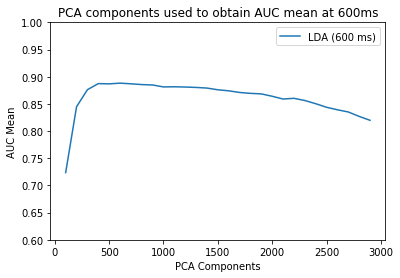

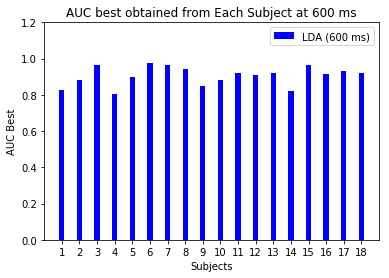

PCA LDA Best Average is (600, 0.88816273)


In [18]:
LDAAvgAUC600ms = np.array([0.72360969,0.84473201,0.87611128,0.88731444,0.88686702,0.88816273,0.88697185,0.88554868,
                           0.88480876,0.88121948,0.88149569,0.88102348,0.88028206,0.87911376,0.8759749,0.87406296,
                           0.87103421,0.86937798,0.86840362,0.86405345,0.85895035,0.86026731,0.85622197,0.85039635,
                           0.8437848,0.83917298,0.83514516,0.82696604,0.81983033])
LDABestAUC600ms = np.array([0.8283208,0.88107033,0.96718358,0.80262925,0.89827225,0.97436749,0.96543757,0.94047402,
                            0.85139129,0.88261228,0.91811188,0.90751759,0.92183445,0.82331631,0.96447447,0.91666045,
                            0.9292038,0.92214916])

previewTheAvgCurve(LDAAvgAUC600ms,"600")
previewTheBestCurve(LDABestAUC600ms,"600")
print("PCA LDA Best Average is " + str(((np.argmax(LDAAvgAUC600ms) + 1) * 100, np.max(LDAAvgAUC600ms))))

<h1>500ms Results</h1>

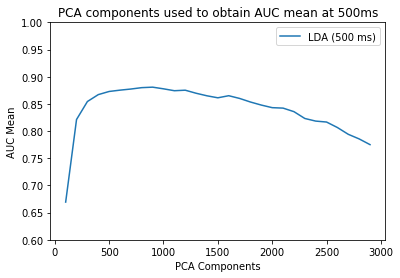

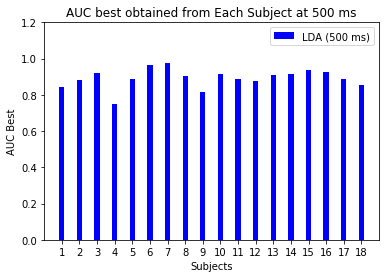

PCA LDA Best Average is (900, 0.88078982)


In [19]:
LDAAvgAUC500ms = np.array([0.66938169,0.82129236,0.85437908,0.86707367,0.8728732,0.87530396,0.87735009,0.87990227,
                           0.88078982,0.8777304,0.87424564,0.87520432,0.86960095,0.8648894,0.86121738,0.86506799,
                           0.86006082,0.85345991,0.84783366,0.84307957,0.84224583,0.83573721,0.82318678,0.81837222,
                           0.81663813,0.80651814,0.79404439,0.78557757,0.77505447])

LDABestAUC500ms = np.array([0.84406566,0.87937146,0.91851371,0.74800654,0.890068,0.96527336,0.97336775,0.90289859,
                            0.81636207,0.91270643,0.88972745,0.87660038,0.91022746,0.91228893,0.9375,0.92378609,
                            0.8875592,0.85519657])

previewTheAvgCurve(LDAAvgAUC500ms,"500")
previewTheBestCurve(LDABestAUC500ms,"500")
print("PCA LDA Best Average is " + str(((np.argmax(LDAAvgAUC500ms) + 1) * 100, np.max(LDAAvgAUC500ms))))

<h1>400ms Results</h1>


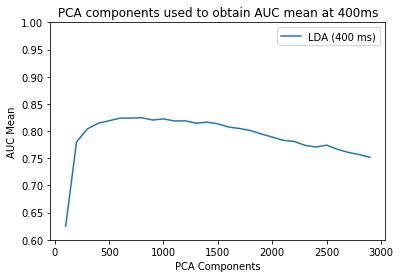

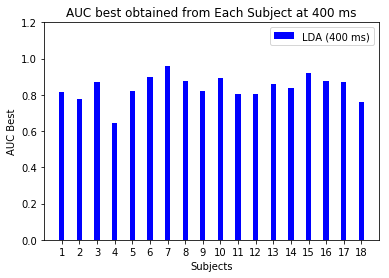

PCA LDA Best Average is (800, 0.82460958)


In [20]:
LDAAvgAUC400ms = np.array([0.62491703,0.780012,0.8041508,0.81434334,0.81906242,0.82381483,0.82390594,0.82460958,
                           0.82035941,0.82236627,0.81858938,0.81888386,0.81450126,0.8163632,0.81334307,0.80744518,
                           0.80472882,0.80095755,0.79466307,0.78901507,0.78306523,0.78108012,0.7738152,0.77065202,
                           0.77409839,0.76648803,0.76081538,0.75672919,0.75169304])

LDABestAUC400ms = np.array([0.81701174,0.77890267,0.87248744,0.64654471,0.81923989,0.89709154,0.95743102,0.8758579,
                            0.81945418,0.89187227,0.80668262,0.8054874,0.86019061,0.83619374,0.91811789,0.87712289,
                            0.87249059,0.75826813])

previewTheAvgCurve(LDAAvgAUC400ms,"400")
previewTheBestCurve(LDABestAUC400ms,"400")
print("PCA LDA Best Average is " + str(((np.argmax(LDAAvgAUC400ms) + 1) * 100, np.max(LDAAvgAUC400ms))))

<h1>300ms Results</h1>

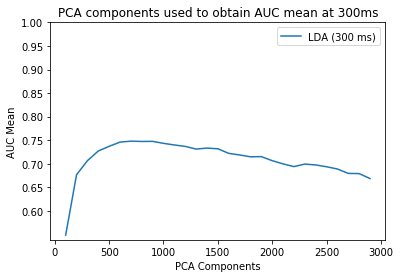

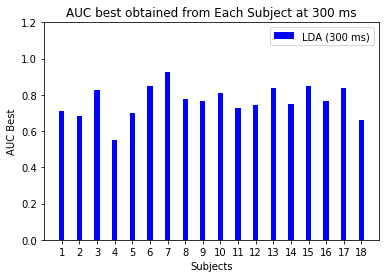

PCA LDA Best Average is (700, 0.74805802)


In [21]:
LDAAvgAUC300ms = np.array([0.54879211,0.67676801,0.70662851,0.7271319,0.73711525,0.74601476,0.74805802,0.74740078,
                           0.74762326,0.74339641,0.7399679,0.7369092,0.73125422,0.73333121,0.73188494,0.7221601,
                           0.71878622,0.71483562,0.71528056,0.70663742,0.69978746,0.69408089,0.69938172,0.69760912,
                           0.69373649,0.68900764,0.67962006,0.67923716,0.66874092])

LDABestAUC300ms = np.array([0.71175508,0.68527438,0.82879605,0.54846862,0.69830176,0.85054035,0.92370997,0.77690105,
                            0.76702169,0.80959868,0.72637431,0.74153622,0.83681868,0.74695846,0.84623295,0.76565136,
                            0.8365535,0.65954574])

previewTheAvgCurve(LDAAvgAUC300ms,"300")
previewTheBestCurve(LDABestAUC300ms,"300")
print("PCA LDA Best Average is " + str(((np.argmax(LDAAvgAUC300ms) + 1) * 100, np.max(LDAAvgAUC300ms))))

<h6>100ms and 200ms Results would be displayed as 2 straight lines with AUC values 0.497185045 and 0.537934368 respectively<br><br>the number of features will be very small to consider making PCA for them<br><br>[(20*59) features for 100ms and (40*59) features for 200ms]<br><br>even the normal LDA AUC values are better for them 0.498583818 and 0.544957153 respectively</h6>

<h1><strong>(II)CHECKING SAME 1000 PCA COMPONENTS FOR ALL TIME WINDOWS</strong></h1>

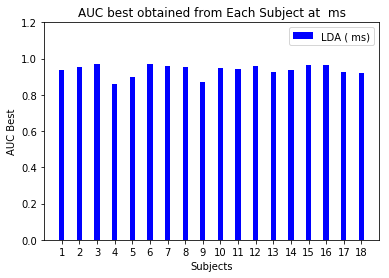

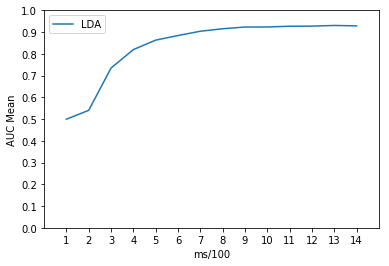

PCA LDA Best Average is (1300, 0.93054887)


In [22]:
LDABestAUC1000PCA = np.array([0.93907947,0.95558248,0.9727992,0.86136571,0.89654523,0.97127823,0.95648465,0.95523729,
                              0.87354554,0.94758304,0.94520659,0.96045002,0.92529541,0.93536501,0.96666667,0.96710526,
                              0.92722236,0.92063492])
previewTheBestCurve(LDABestAUC1000PCA,"")

LDAAvgAUC1000PCA = np.array([0.49950131,0.54028722,0.73463941,0.81958667,0.86308874,0.88429562,0.90392697,0.91544739,
                             0.92333653,0.9235346,0.92694986,0.92745276,0.93054887,0.92871976])


plt.plot(np.arange(1,15,1), LDAAvgAUC1000PCA, label="LDA")
plt.ylabel("AUC Mean")
plt.xlabel("ms/100")
plt.legend()
plt.yticks(np.arange(0,1.1,0.1))
plt.autoscale(tight=True)
plt.legend()
plt.ylim((0, 1))
plt.xlim((0,15))
plt.xticks(np.arange(1,15,1), np.arange(1,15,1))


plt.show()
print("PCA LDA Best Average is " + str(((np.argmax(LDAAvgAUC1000PCA) + 1) * 100, np.max(LDAAvgAUC1000PCA))))

<h1> best AUC Obtained in every Time window </h1>

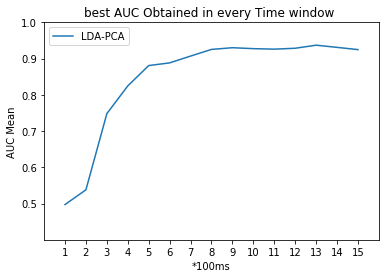

In [23]:
finalAUCTimeData = np.array([0.497185045,0.537934368,0.74805802,0.82460958,0.88078982,0.88816273,0.90691592,
                             0.92535837,0.93003608,0.92746619,0.92608357,0.928544,0.93699602,0.930996499,0.924826587])

plt.plot(np.arange(1,16,1), finalAUCTimeData, label="LDA-PCA")
plt.title("best AUC Obtained in every Time window ")
plt.ylabel("AUC Mean")
plt.xlabel("*100ms")
plt.legend()
plt.yticks(np.arange(0.5,1.1,0.1))
plt.autoscale(tight=True)
plt.legend()
plt.ylim((0.4, 1))
plt.xlim((0,16))
plt.xticks(np.arange(1,16,1), np.arange(1,16,1))


plt.show()

<h1>best Number of PCA Components Obtained in every Time window</h1>

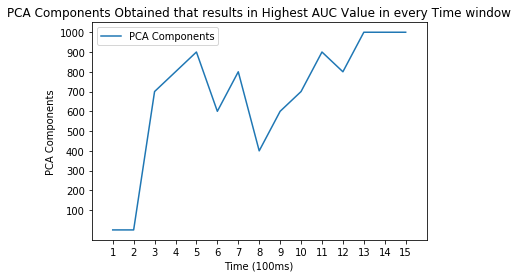

In [24]:
finalPCATimeValues = np.array([0,0,700,800,900,600,800,400,600,700,900,800,1000,1000,1000])


plt.plot(np.arange(1,16,1), finalPCATimeValues, label="PCA Components")
plt.title("PCA Components Obtained that results in Highest AUC Value in every Time window")
plt.ylabel("PCA Components")
plt.xlabel("Time (100ms)")
plt.legend()
plt.yticks(np.arange(100,1100,100))
#plt.autoscale(tight=True)

plt.xlim((0,16))
plt.xticks(np.arange(1,16,1), np.arange(1,16,1))
plt.show()


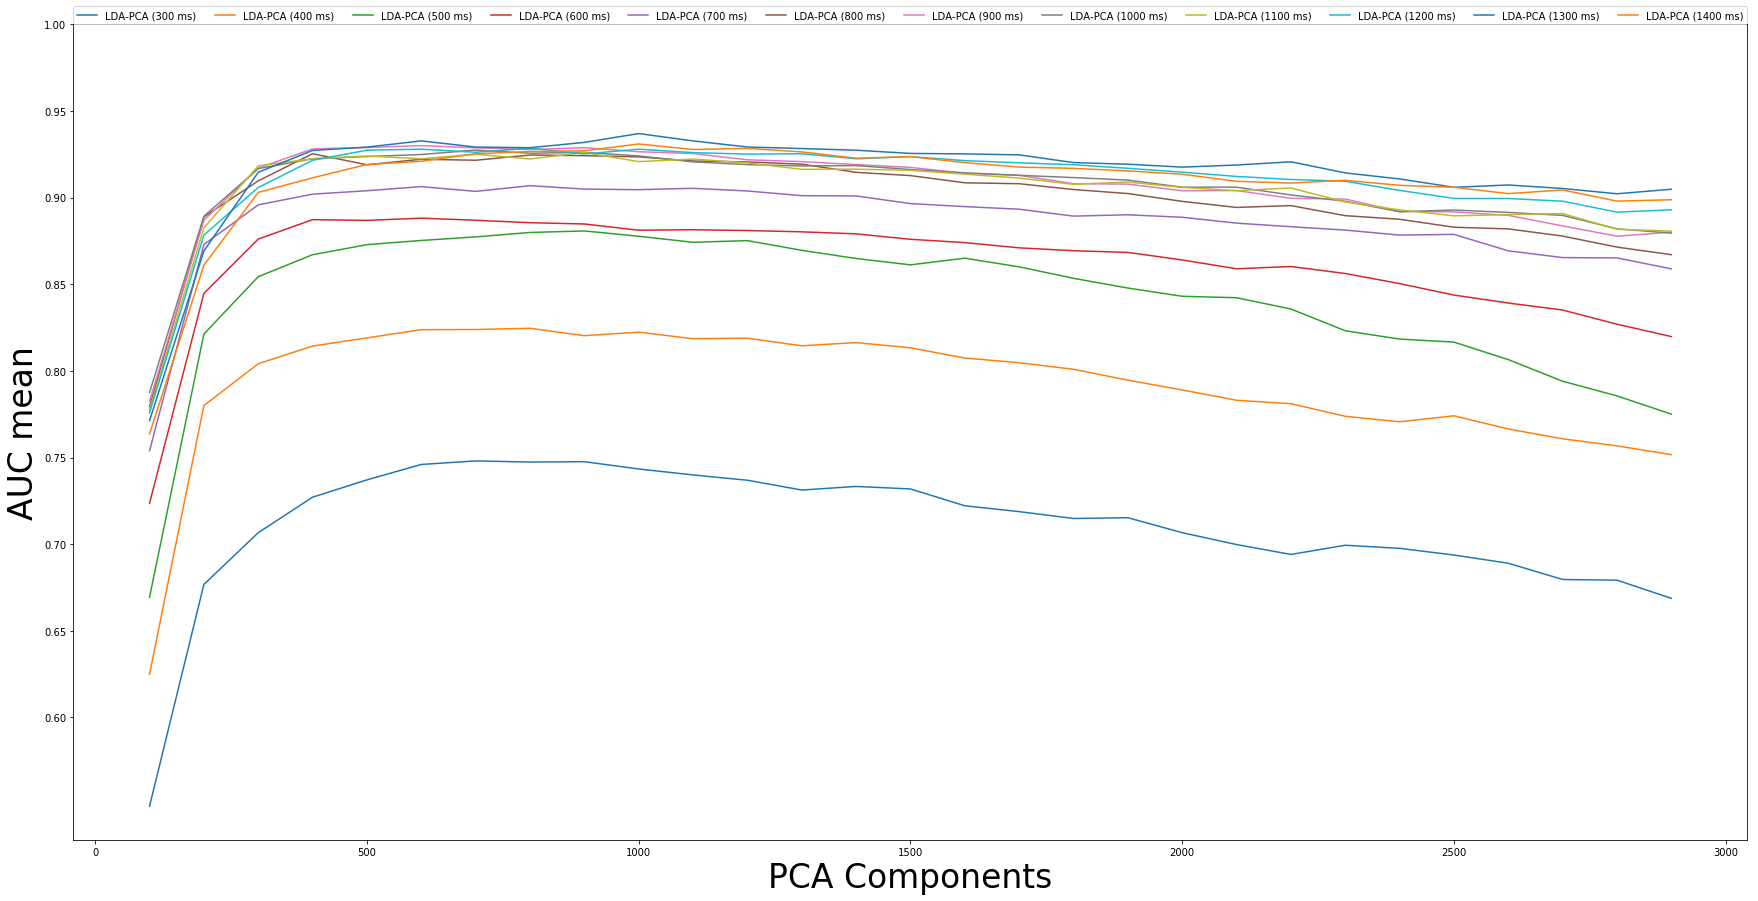

In [25]:
fig, ax = plt.subplots(figsize = (30, 15))
ax.plot(numOFComponents, LDAAvgAUC300ms, label="LDA-PCA (300 ms)")
ax.plot(numOFComponents, LDAAvgAUC400ms, label="LDA-PCA (400 ms)")
ax.plot(numOFComponents, LDAAvgAUC500ms, label="LDA-PCA (500 ms)")
ax.plot(numOFComponents, LDAAvgAUC600ms, label="LDA-PCA (600 ms)")
ax.plot(numOFComponents, LDAAvgAUC700ms, label="LDA-PCA (700 ms)")
ax.plot(numOFComponents, LDAAvgAUC800ms, label="LDA-PCA (800 ms)")
ax.plot(numOFComponents, LDAAvgAUC900ms, label="LDA-PCA (900 ms)")
ax.plot(numOFComponents, LDAAvgAUC1000ms, label="LDA-PCA (1000 ms)")
ax.plot(numOFComponents, LDAAvgAUC1100ms, label="LDA-PCA (1100 ms)")
ax.plot(numOFComponents, LDAAvgAUC1200ms, label="LDA-PCA (1200 ms)")
ax.plot(numOFComponents, LDAAvgAUC1300ms, label="LDA-PCA (1300 ms)")
ax.plot(numOFComponents, LDAAvgAUC1400ms, label="LDA-PCA (1400 ms)")
ax.set_xlabel('PCA Components', fontsize=33)
ax.set_ylabel('AUC mean', fontsize=33)
plt.yticks(np.arange(0.6,1.01,0.05))
ax.legend(bbox_to_anchor=(0., 1., 1., .102), loc=4,ncol=18, mode="expand", borderaxespad=0.)
plt.savefig("PCA components used to obtain AUC mean.png")
plt.show()

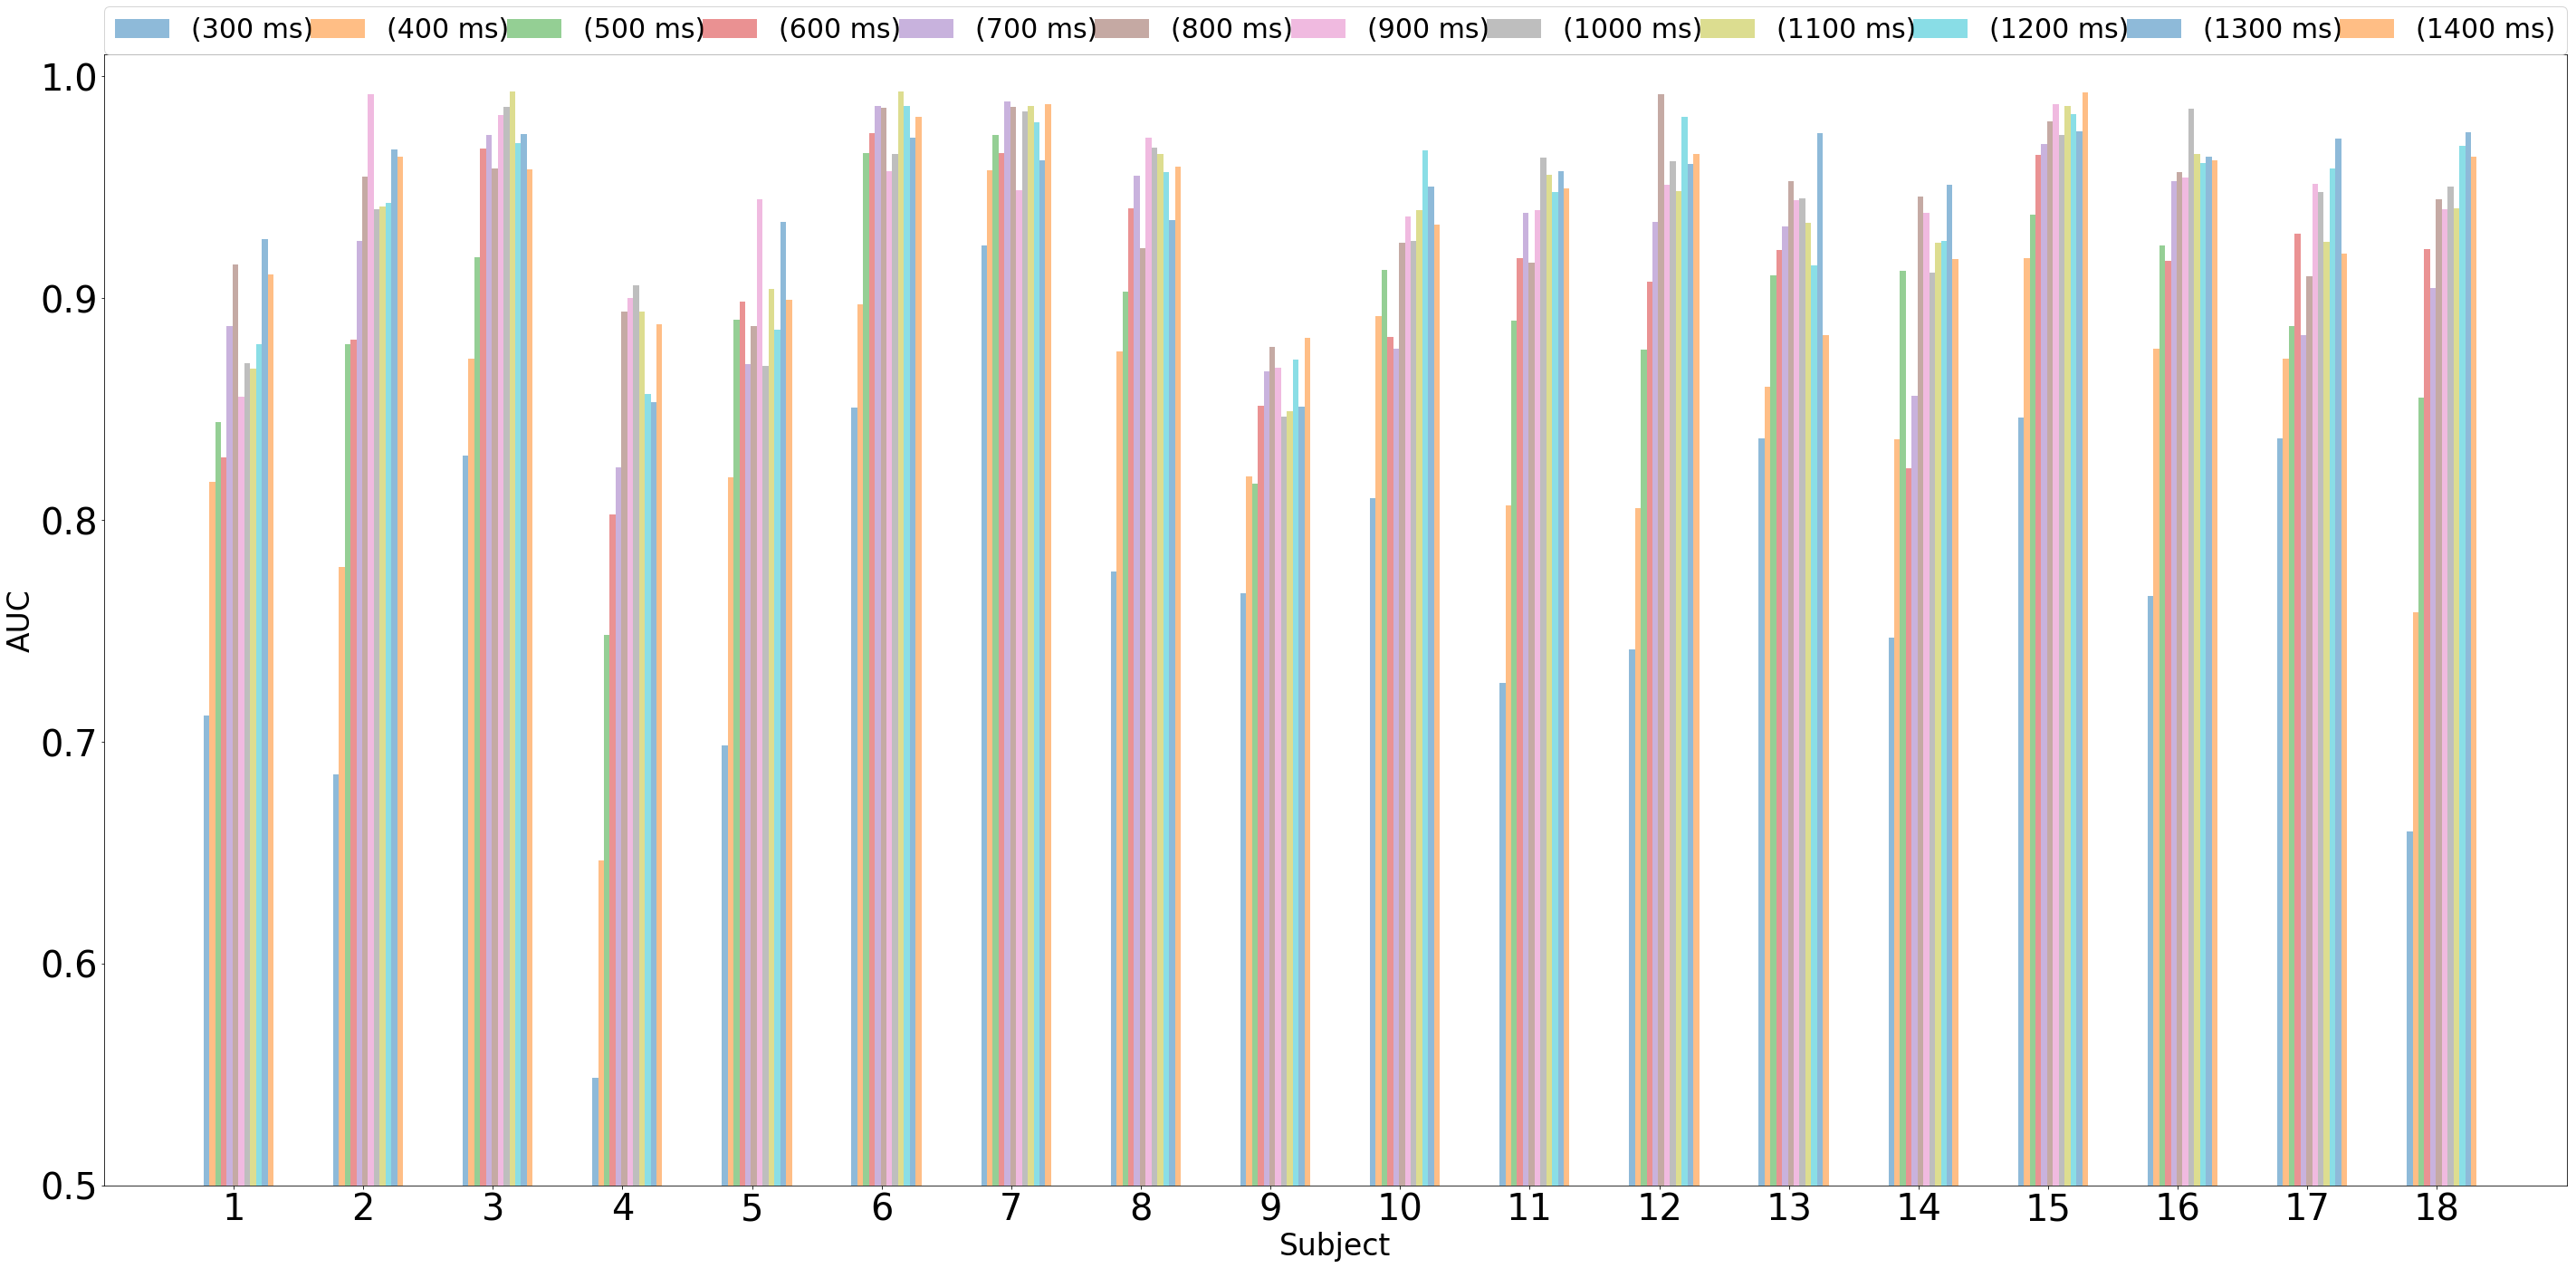

In [29]:
fig, ax = plt.subplots(figsize = (40,20))
bar_width = 0.045
opacity = 0.5
w = 2
ax.set_xlabel('Subject', fontsize=33)
ax.set_ylabel('AUC', fontsize=33)
#ax.set_title('Accuracy for each subject using method one to extract the features', fontsize=30, fontweight="bold")
ax.set_xticks(numOFSubjects + bar_width / 2)
ax.bar(numOFSubjects-0.3+ bar_width*w ,LDABestAUC300ms , bar_width,alpha=opacity,label="(300 ms)")
ax.bar(numOFSubjects-0.3+ bar_width*(w+1) ,LDABestAUC400ms , bar_width,alpha=opacity, label="(400 ms)")
ax.bar(numOFSubjects-0.3+ bar_width*(w+2) ,LDABestAUC500ms , bar_width,alpha=opacity, label="(500 ms)")
ax.bar(numOFSubjects-0.3+ bar_width*(w+3) ,LDABestAUC600ms , bar_width,alpha=opacity, label="(600 ms)")
ax.bar(numOFSubjects-0.3+ bar_width*(w+4) ,LDABestAUC700ms , bar_width,alpha=opacity, label="(700 ms)")
ax.bar(numOFSubjects-0.3+ bar_width*(w+5) ,LDABestAUC800ms , bar_width,alpha=opacity, label="(800 ms)")
ax.bar(numOFSubjects-0.3+ bar_width*(w+6) ,LDABestAUC900ms , bar_width,alpha=opacity, label="(900 ms)")
ax.bar(numOFSubjects-0.3+ bar_width*(w+7) ,LDABestAUC1000ms , bar_width,alpha=opacity, label="(1000 ms)")
ax.bar(numOFSubjects-0.3+ bar_width*(w+8) ,LDABestAUC1100ms , bar_width,alpha=opacity, label="(1100 ms)")
ax.bar(numOFSubjects-0.3+ bar_width*(w+9) ,LDABestAUC1200ms , bar_width,alpha=opacity, label="(1200 ms)")
ax.bar(numOFSubjects-0.3+ bar_width*(w+10) ,LDABestAUC1300ms , bar_width,alpha=opacity, label="(1300 ms)")
ax.bar(numOFSubjects-0.3+ bar_width*(w+11) ,LDABestAUC1400ms , bar_width,alpha=opacity, label="(1400 ms)")
plt.legend()
plt.ylim((0.5, 1.01))
plt.xlim((0,19))
ax.set_xticks(numOFSubjects + int(bar_width / 2))
ax.legend(bbox_to_anchor=(0., 1., 1., .202), loc=4,ncol=18, mode="expand", borderaxespad=0.)
fig.tight_layout()
plt.savefig("AUC best obtained in Each Subject on LDA-PCA.png")
plt.tick_params(labelsize=40)
plt.rcParams.update({'font.size': 30})
plt.show()


In [27]:
x = np.append([LDABestAUC300ms],[LDABestAUC400ms],axis=0)
x = np.append(x,[LDABestAUC500ms],axis=0)
x = np.append(x,[LDABestAUC600ms],axis=0)
x = np.append(x,[LDABestAUC700ms],axis=0)
x = np.append(x,[LDABestAUC800ms],axis=0)
x = np.append(x,[LDABestAUC900ms],axis=0)
x = np.append(x,[LDABestAUC1000ms],axis=0)
x = np.append(x,[LDABestAUC1100ms],axis=0)
x = np.append(x,[LDABestAUC1200ms],axis=0)
x = np.append(x,[LDABestAUC1300ms],axis=0)
x = np.append(x,[LDABestAUC1400ms],axis=0)


print(x[0:5])
print("-------")
print(x[0:5,1])
print("-------")

print(x.shape)

x=x.T
print(x.shape)

[[0.71175508 0.68527438 0.82879605 0.54846862 0.69830176 0.85054035
  0.92370997 0.77690105 0.76702169 0.80959868 0.72637431 0.74153622
  0.83681868 0.74695846 0.84623295 0.76565136 0.8365535  0.65954574]
 [0.81701174 0.77890267 0.87248744 0.64654471 0.81923989 0.89709154
  0.95743102 0.8758579  0.81945418 0.89187227 0.80668262 0.8054874
  0.86019061 0.83619374 0.91811789 0.87712289 0.87249059 0.75826813]
 [0.84406566 0.87937146 0.91851371 0.74800654 0.890068   0.96527336
  0.97336775 0.90289859 0.81636207 0.91270643 0.88972745 0.87660038
  0.91022746 0.91228893 0.9375     0.92378609 0.8875592  0.85519657]
 [0.8283208  0.88107033 0.96718358 0.80262925 0.89827225 0.97436749
  0.96543757 0.94047402 0.85139129 0.88261228 0.91811188 0.90751759
  0.92183445 0.82331631 0.96447447 0.91666045 0.9292038  0.92214916]
 [0.88731952 0.92584481 0.97341772 0.82359848 0.8703271  0.98652665
  0.98850575 0.95526546 0.86705581 0.877308   0.93851346 0.93414787
  0.93239112 0.85574791 0.96951219 0.95259771

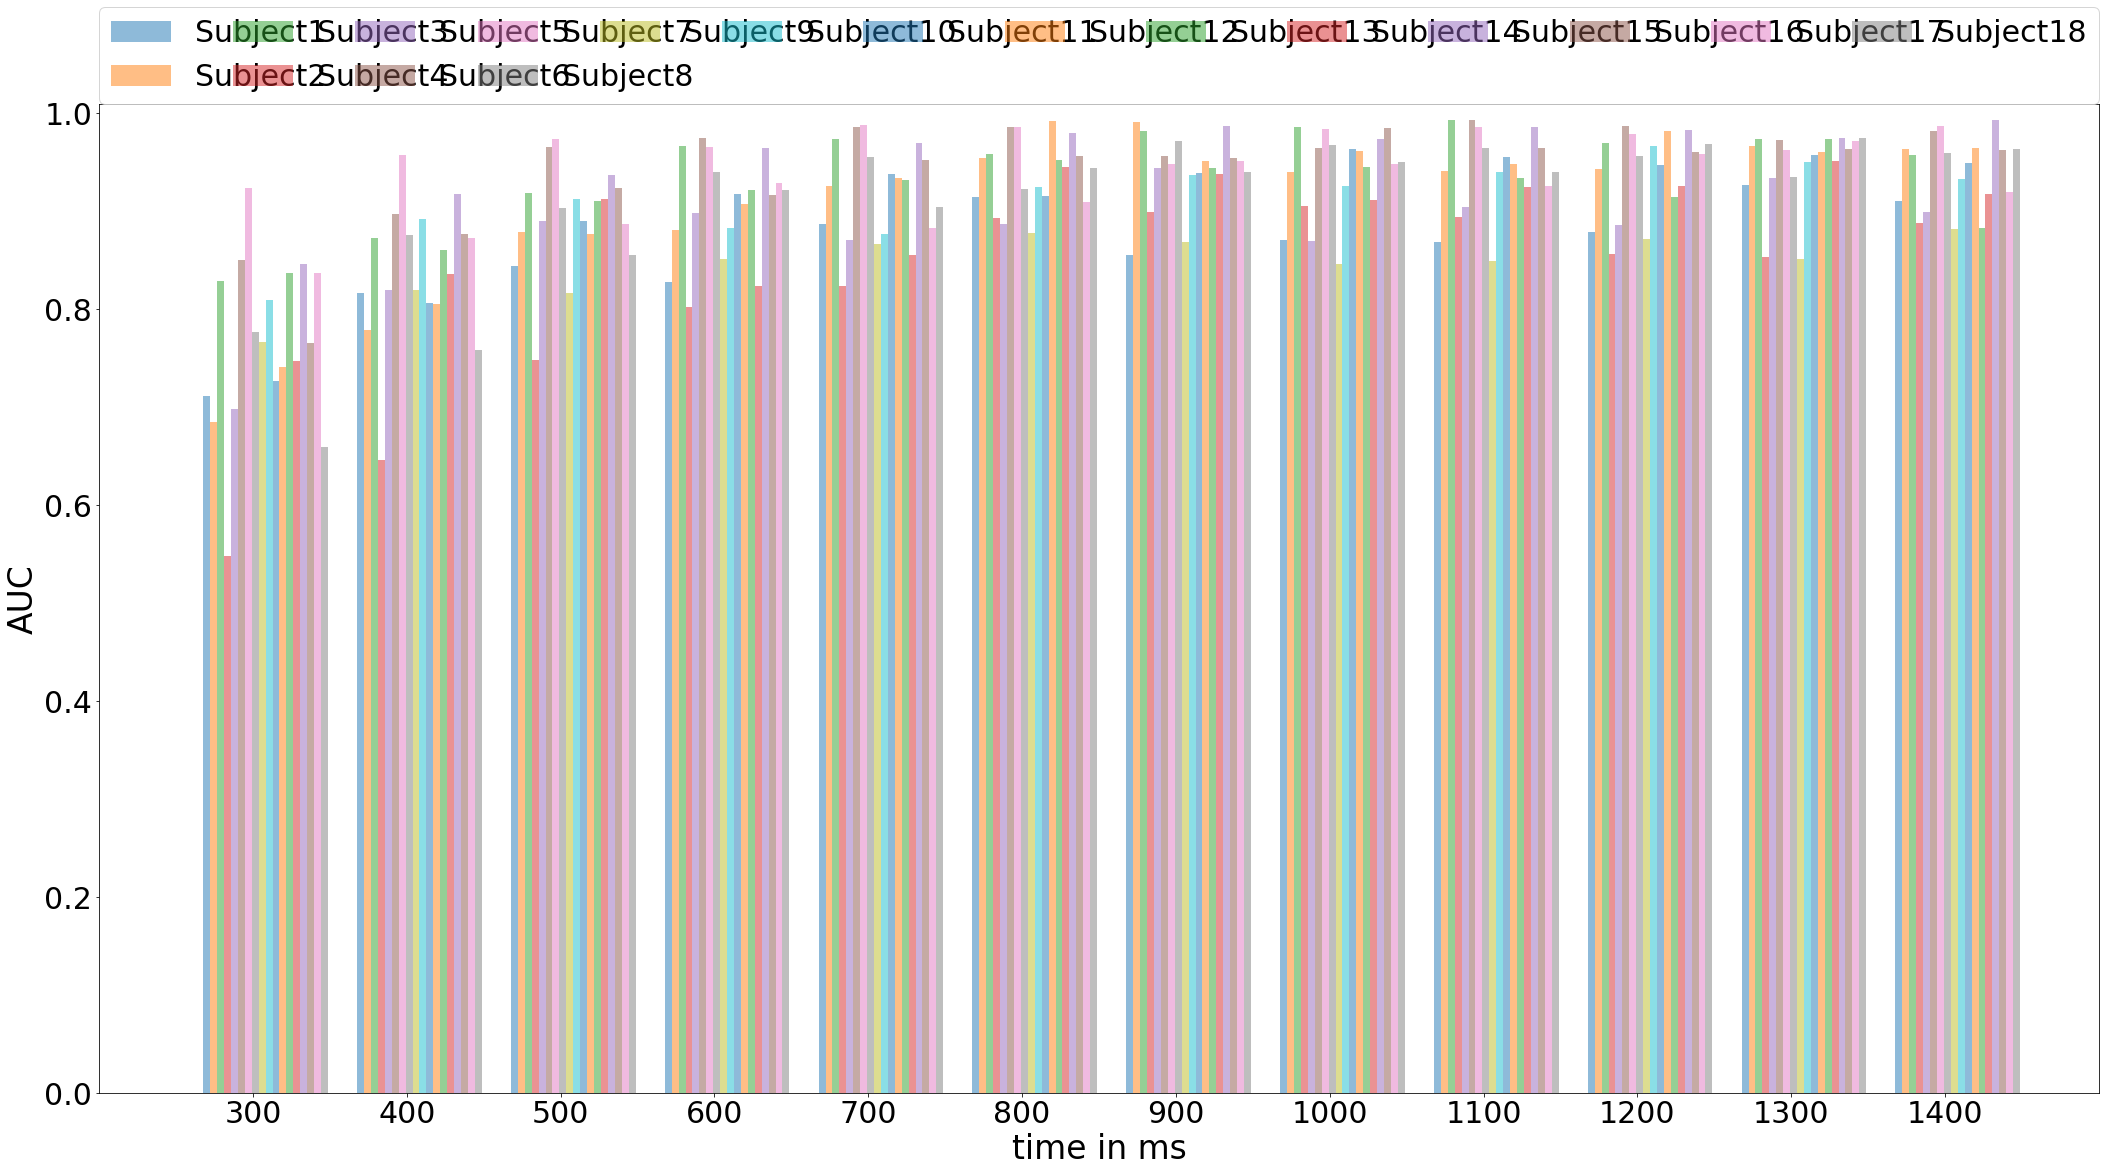

In [28]:
fig, ax = plt.subplots(figsize = (30, 17))
bar_width = 0.045*100
opacity = 0.5
w = 1

index = (np.arange(1,13,1)+2)*100

ax.set_xlabel('time in ms', fontsize=33)
ax.set_ylabel('AUC', fontsize=33)

for i in range(18):
    ax.bar(index-30+ bar_width*i ,x[i,:], bar_width,alpha=opacity,label="Subject"+str(i+1))
    
plt.ylim((0, 1.01))
plt.xlim((200,1500))
ax.set_xticks(index)
ax.legend(bbox_to_anchor=(0., 1., 1., .20), loc=3,ncol=14, mode="expand", borderaxespad=0.)
fig.tight_layout()
plt.savefig("AUC best obtained in Each Subject on LDA-PCA.png")
plt.show()
